In [ ]:
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

## LIBRERIAS E INSTALACIONES

In [ ]:
#instalaciones que piden reinicio
!pip install -U spacy
!python -m spacy download es_core_news_lg
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Se importan bibliotecas
import spacy
import nltk
import pandas as pd
import numpy as np
import re
import unicodedata

nltk.download('stopwords')
nltk.download('punkt')

#utilizo lg en lugar de sm por que es mas grande
nlp = spacy.load("es_core_news_lg")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## DATOS

In [ ]:
#se importa un csv como texto:
df=pd.read_csv('/content/drive/MyDrive/MAESTRIA/PLN/corpus_5_temas.csv')
#print(df.head(10).to_string())
texto= df['frase'].str.cat(sep='')# conversión a una sola cadena para facilidad de analisis
print(texto)

La ciberseguridad protege la información digital. La inteligencia artificial transforma múltiples industrias. El baloncesto combina velocidad, técnica y trabajo en equipo. El hardware y el software son complementarios en la computación. La democracia permite la participación ciudadana en decisiones. La natación es una disciplina que fortalece todo el cuerpo. Los algoritmos son la base de la programación informática. El hardware y el software son complementarios en la computación. El hardware y el software son complementarios en la computación. Los algoritmos son la base de la programación informática. La inteligencia artificial transforma múltiples industrias. Los partidos políticos representan diferentes ideologías. La natación es una disciplina que fortalece todo el cuerpo. El debate público fortalece la vida democrática. El baloncesto combina velocidad, técnica y trabajo en equipo. Los atletas requieren entrenamiento constante para mejorar. El debate público fortalece la vida democr

## PREPROCESAMIENTO

In [ ]:
# Minúsculas
doc = nlp(texto.lower())

# Lemas + Stopwords
# Se utilizan las propiedades de spaCy para un filtrar.
lemmas = [token.lemma_ for token in doc
    if not token.is_stop and token.is_alpha and len(token.lemma_) > 1]

#Se almacena el resultado en "lemmas"
token_text = lemmas

print(token_text)

['ciberseguridad', 'proteger', 'información', 'digital', 'inteligencia', 'artificial', 'transformar', 'múltiple', 'industria', 'baloncesto', 'combinar', 'velocidad', 'técnica', 'trabajo', 'equipo', 'hardware', 'software', 'complementario', 'computación', 'democracia', 'permitir', 'participación', 'ciudadano', 'decisión', 'natación', 'disciplina', 'fortalecer', 'cuerpo', 'algoritmo', 'base', 'programación', 'informático', 'hardware', 'software', 'complementario', 'computación', 'hardware', 'software', 'complementario', 'computación', 'algoritmo', 'base', 'programación', 'informático', 'inteligencia', 'artificial', 'transformar', 'múltiple', 'industria', 'partido', 'político', 'representar', 'ideología', 'natación', 'disciplina', 'fortalecer', 'cuerpo', 'debate', 'público', 'fortalecer', 'vida', 'democrático', 'baloncesto', 'combinar', 'velocidad', 'técnica', 'trabajo', 'equipo', 'atleta', 'requerir', 'entrenamiento', 'constante', 'mejorar', 'debate', 'público', 'fortalecer', 'vida', 'de

## EMBEDDINGS + REDUCCIÓN DE DIMENSIONALIDAD + GRAFICA

### Librerías

In [ ]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

###Modelo & Embeddings

In [ ]:
model=api.load('fasttext-wiki-news-subwords-300')
print('modelo cargado');separador()

[==================================================] 100.0% 958.5/958.4MB downloaded
modelo cargado




In [ ]:
texto_valido=[t for t in token_text if t in model.key_to_index]
texto_valido = list(set(texto_valido)) #para evitar repetidos y que se empalme y no se note bien la distinción
print(f'Las palabras a utilizar son {len(texto_valido)}:\n{texto_valido}');separador()
E=np.array([model[t] for t in texto_valido])
print(f'Ejemplo de vectores sin reducir del primer termino:');separador()
print(E[0]);separador()

Las palabras a utilizar son 56:
['información', 'atleta', 'popular', 'partido', 'digital', 'disciplina', 'unión', 'representar', 'permitir', 'constante', 'elección', 'pueblo', 'debate', 'nube', 'participación', 'base', 'deporte', 'libre', 'esencial', 'baloncesto', 'vida', 'político', 'ideología', 'dato', 'mundo', 'atender', 'democrático', 'velocidad', 'software', 'programación', 'social', 'inteligencia', 'múltiple', 'público', 'equipo', 'democracia', 'industria', 'escala', 'necesidad', 'fortalecer', 'mejorar', 'buscar', 'derecho', 'técnica', 'cuerpo', 'decisión', 'algoritmo', 'entrenamiento', 'fútbol', 'ciudadano', 'transformar', 'trabajo', 'hardware', 'proteger', 'artificial', 'política']


Ejemplo de vectores sin reducir del primer termino:


[ 0.015986   -0.019717   -0.050346   -0.033114    0.0046089   0.016997
 -0.051957   -0.03349    -0.047072   -0.036593   -0.037773   -0.038765
 -0.06266     0.0022588   0.0043692   0.03619     0.040933    0.0070899
  0.058236    0.026362   -0.069

### Reducción de dimensionalidad

In [ ]:
tsne=TSNE(n_components=2,perplexity=20,random_state=8, init='pca')
E_2d=tsne.fit_transform(E)
print(f'Comparación antes y después de la reducción:\nAntes:{len(E[0])} vectores\nDespués:{len(E_2d[0])} vectores');separador()


Comparación antes y después de la reducción:
Antes:300 vectores
Después:2 vectores




### Visualización

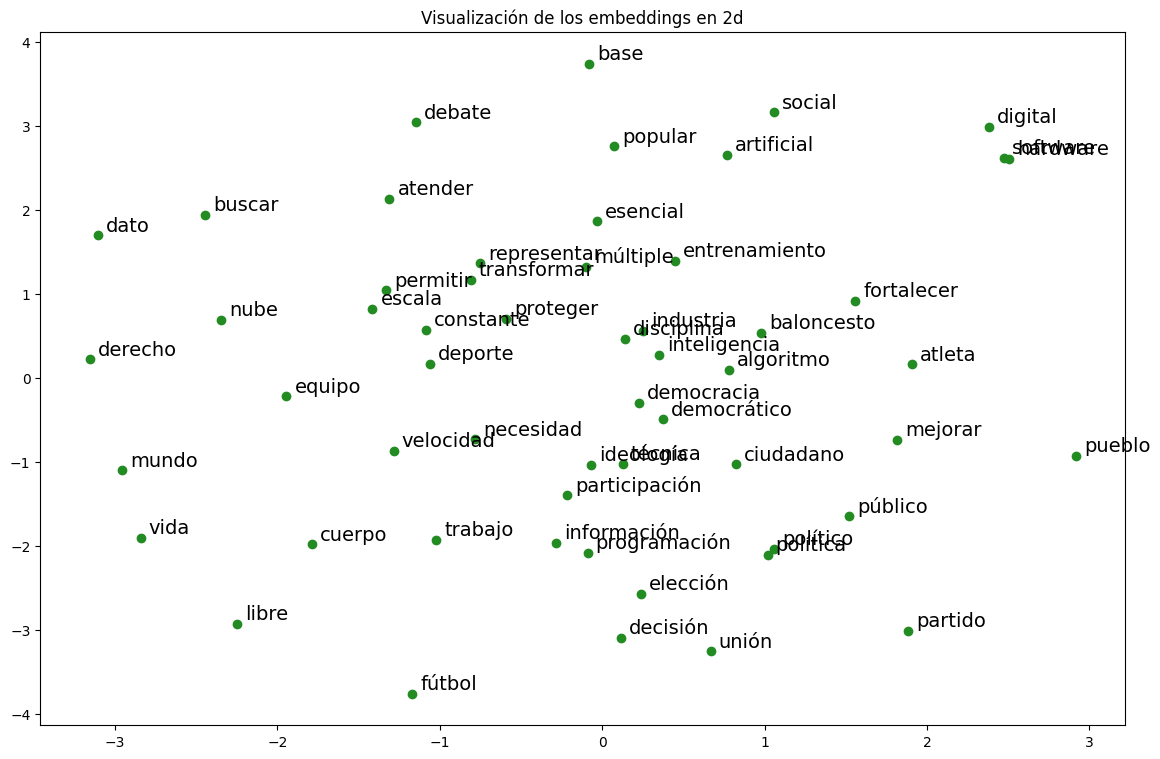

In [ ]:
#visualización
plt.figure(figsize=(14,9))
for i, palabra in enumerate(texto_valido):
  x,y= E_2d[i,0],E_2d[i,1]
  plt.scatter(x,y,c='forestgreen')
  plt.text(x+0.05,y+0.05,palabra,fontsize=14)
plt.title('Visualización de los embeddings en 2d')
plt.show()

## OBSERVACIONES

#Noté 3 areas en principales en donde se agruparon puntos en común: Vida civica, deporte y tecnología. Son coherentes a significados en la realidad. Hay otros conceptos relacionados con estas areas que se encuentran aislados, es importante recordar que al reducir de 300 dimensiones a 2 es muy probable que haya este tipo de distorsiones espaciales. Así como algunos conceptos que por pertenecer a varios grupos no pertenecen a ningun cluster en especial.